In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorboard as tb

In [2]:
## ACHTUNG: wahrscheinlich sollte man nochmal den endgültigen Ordner hochladen, denn der hier enthält nicht die
# aktuellsten Dinge

In [3]:
#experiment_id = "GNumT5w6Ska27Mz0v5lgtg" # das ist ein Test-Ordner zum Ausprobieren

folder_id = "Z3kT6OA5SNS1a42js4dw2w" # das ist der tatsächliche runs_avgTimeOnPage (Stand 19.04.)


folder_experiment = tb.data.experimental.ExperimentFromDev(folder_id)
data = folder_experiment.get_scalars()
data

,run,tag,step,value
0,BERT_FIXLEN300_MINLENNone_START0_EP8_BS8_LR1e-...,Pearson,300,0.088822
1,BERT_FIXLEN300_MINLENNone_START0_EP8_BS8_LR1e-...,Pearson,600,0.108572
2,BERT_FIXLEN300_MINLENNone_START0_EP8_BS8_LR1e-...,Pearson,900,0.122659
3,BERT_FIXLEN300_MINLENNone_START0_EP8_BS8_LR1e-...,Pearson,1200,0.112997
4,BERT_FIXLEN300_MINLENNone_START0_EP8_BS8_LR1e-...,Pearson,1500,0.116896
...,...,...,...,...
381736,baseline_EP100_BS8_LR0.001_avgTimeOnPage_NOZ,train_loss_epoch,95,15800.020508
381737,baseline_EP100_BS8_LR0.001_avgTimeOnPage_NOZ,train_loss_epoch,96,15732.759766
381738,baseline_EP100_BS8_LR0.001_avgTimeOnPage_NOZ,train_loss_epoch,97,15820.269531
381739,baseline_EP100_BS8_LR0.001_avgTimeOnPage_NOZ,train_loss_epoch,98,15728.113281


In [4]:
data.run.value_counts()

CNN_FIXLEN800_MINLENNone_START0_EP100_BS32_LR0.0001_avgTimeOnPage_NOZ_num_filters_64_2021-03-30_12:54:24    17878
baseline_EP100_BS8_LR0.001_avgTimeOnPage_NOZ                                                                11581
BertHierarchicalRNN_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_2021-04-14_11:14:43    10235
CNN_FIXLEN128_MINLENNone_START0_EP50_BS32_LR0.001_avgTimeOnPage_NOZ_noFFN_2021-03-11_13:23:03                9448
CNN_FIXLEN800_MINLENNone_START0_EP50_BS32_LR0.0002_avgTimeOnPage_NOZ_2021-03-10_10:15:33                     9448
                                                                                                            ...  
BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_cleanedDF_2021-04-07_15:07:26          78
CNN_FIXLEN300_MINLENNone_START0_EP5_BS8_LR0.0001_avgTimeOnPage_NOZ_sample                                      66
BertTextlength_FIXLEN512_MINLENNone_START0_EP40_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-0

## die (wichtigen) Runs bekommen Namen

In [5]:
test = data[data.run == "BertTextlength_FIXLEN128_MINLENNone_START0_EP40_BS32_LR1e-05_avgTimeOnPage_NOZ"]

hierarchical = data[data.run == "BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP100_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_2021-04-08_15:29:27"]

bertFFN = data[data.run == "BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-03_00:13:33"]

hierarchical_pretrained = data[data.run == "BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-04-19_12:21:17"]

bert_textlength = data[data.run == "BertTextlength_FIXLEN512_MINLENNone_START0_EP40_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-01_17:14:32"]

## jetzt auswählen, welches Modell/Lauf man genauer betrachten will

In [6]:
#df = test
#df = hierarchical
df = bertFFN
#df = hierarchical_pretrained
#df = bert_textlength

In [7]:
df.shape

(4263, 4)

In [8]:
data.shape

(381741, 4)

In [9]:
df[df.tag=="MAE"].head()

,run,tag,step,value
97261,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,3000,62.382504
97262,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,6000,64.822624
97263,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,9000,60.016376
97264,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,12000,58.930950
97265,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,15000,59.207825


In [10]:
df[df.tag=="Pearson"].head()

,run,tag,step,value
97665,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,3000,0.389569
97666,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,6000,0.539656
97667,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,9000,0.593054
97668,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,12000,0.591826
97669,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,15000,0.607964


In [11]:
df[df.tag=="train_loss"].head()

,run,tag,step,value
98473,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,200,54627.613281
98474,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,400,43908.179688
98475,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,600,34487.957031
98476,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,800,26201.537109
98477,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,1000,14298.830078


In [12]:
df.tag.value_counts()

train_loss          3031
Pearson              202
RAE                  202
eval_loss            202
Spearman             202
MSE                  202
MAE                  202
train_loss_epoch      20
Name: tag, dtype: int64

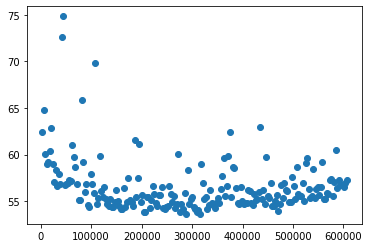

In [13]:
plt.scatter(df[df.tag == "MAE"].step, 
            df[df.tag == "MAE"].value)

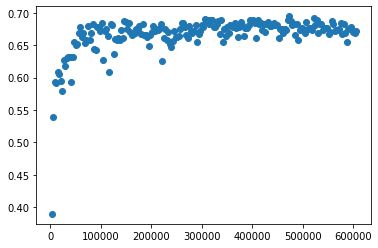

In [14]:
plt.scatter(df[df.tag == "Pearson"].step, 
            df[df.tag == "Pearson"].value)

train_loss


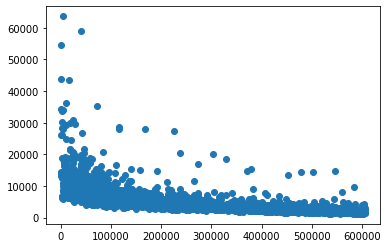

Pearson


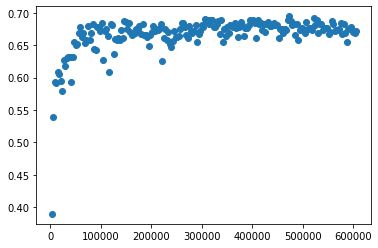

RAE


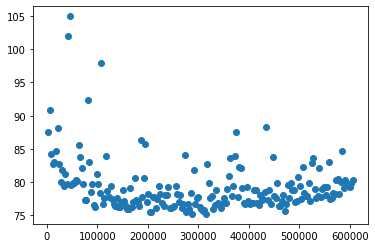

eval_loss


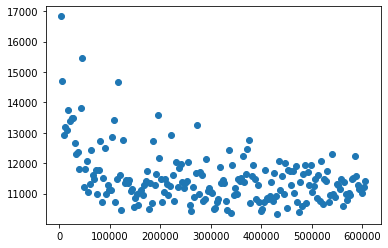

Spearman


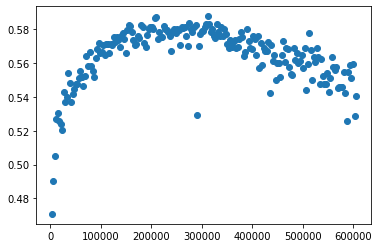

MSE


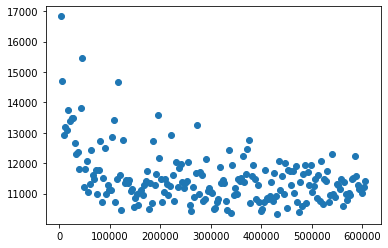

MAE


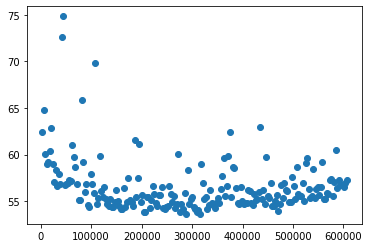

train_loss_epoch


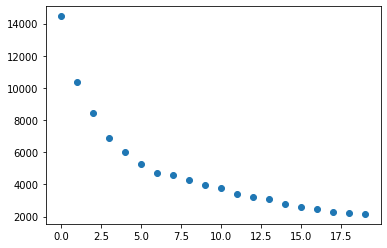

In [15]:
for t in df.tag.value_counts().keys():
    print(t)
    plt.scatter(df[df.tag == t].step, 
                df[df.tag == t].value)
    plt.show()

In [16]:
import numpy as np

In [17]:
# den höchsten Pearson-Wert finden
print(np.max(df[df.tag=="Pearson"].value))

# ist nicht unbedingt überall der beste Wert...
print(np.min(df[df.tag=="MAE"].value))
print(np.min(df[df.tag=="RAE"].value))
print(np.min(df[df.tag=="MSE"].value))


0.6945405602455139
53.62662124633789
75.2181167602539
10331.818359375


In [18]:
# oder so (findet auch den step)

df[df.tag=="Pearson"].sort_values("value", ascending=False)

,run,tag,step,value
97822,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,474032,0.694541
97838,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,522034,0.691315
97766,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,306020,0.690807
97796,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,396026,0.689435
97798,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,402026,0.689368
...,...,...,...,...
97667,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,9000,0.593054
97668,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,12000,0.591826
97672,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,24000,0.579358
97666,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,6000,0.539656


In [19]:
best_step = df[df.tag=="Pearson"].sort_values("value", ascending=False).iloc[0].step

#best_step = df[df.tag=="MAE"].sort_values("value", ascending=True).iloc[0].step


print(best_step)

474032


In [20]:
# alle anderen Werte an der Stelle kriegen
df[df.step == best_step]

,run,tag,step,value
97418,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MAE,474032,54.680687
97620,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,MSE,474032,10402.649414
97822,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Pearson,474032,0.694541
98024,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,RAE,474032,76.689056
98226,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,Spearman,474032,0.557642
98428,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,eval_loss,474032,10402.649414
100842,BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_...,train_loss,474032,1953.518677


In [16]:
# das hier geht (eigentlich): Die steps nicht für jeden Scalar (MAE, Pearson, ...) als einzelne Zeilen, sondern pro Step eine Zeile mit mehrerern Spalten
# das Problem hier ist, dass ja nicht zu allen steps alles gemacht wird (train loss öfter als der Rest)
df_steps = experiment.get_scalars(pivot=True) 
df_steps

ValueError: pivoted DataFrame contains missing value(s). This is likely due to two timeseries having different sets of steps in your experiment. You can avoid this error by calling `get_scalars()` with `pivot=False` to disable the DataFrame pivoting.